<a href="https://colab.research.google.com/github/e-evarela/DataJour/blob/main/KATHIMERINI_ENOIKIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [3]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [4]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [5]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [6]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [7]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [8]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 72.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import spacy

In [10]:
nlp = spacy.load('el_core_news_sm')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_Kathimerini_enoikia.csv")
# airbnb_df = pd.read_csv(data_csv_url)

In [13]:
airbnb_df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


article_url  \
0   https://www.kathimerini.gr/politics/563652409/...   
1   https://www.kathimerini.gr/k/k-magazine/563578...   
2   https://www.kathimerini.gr/visual/infographics...   
3   https://www.kathimerini.gr/economy/563537686/a...   
4   https://www.kathimerini.gr/economy/563521807/g...   
5   https://www.kathimerini.gr/economy/563453656/l...   
6   https://www.kathimerini.gr/economy/563447911/l...   
7   https://www.kathimerini.gr/economy/563439274/d...   
8   https://www.kathimerini.gr/economy/563392453/o...   
9   https://www.kathimerini.gr/society/563380492/o...   
10  https://www.kathimerini.gr/economy/563334754/o...   
11  https://www.kathimerini.gr/visual/infographics...   
12  https://www.kathimerini.gr/economy/563278318/e...   
13  https://www.kathimerini.gr/economy/563266429/s...   
14  https://www.kathimerini.gr/economy/563252341/a...   
15  https://www.kathimerini.gr/economy/563237626/a...   
16  https://www.kathimerini.gr/economy/local/56322...   
17  https://www.kathimerini.gr/economy/563211829/k...   
18  https://www.kathimerini.gr/society/reportaz/56...   
19  https://www.kathimerini.gr/economy/563196550/d...   
20  https://www.kathimerini.gr/economy/real-estate...   
21  https://www.kathimerini.gr/economy/563179756/s...   
22  https://www.kathimerini.gr/economy/563060686/t...   
23  https://www.kathimerini.gr/opinion/563002138/g...   
24  https://www.kathimerini.gr/economy/562993981/o...   
25  https://www.kathimerini.gr/economy/562900828/e...   
26  https://www.kathimerini.gr/economy/local/56289...   
27  https://www.kathimerini.gr/politics/562878631/...   
28  https://www.kathimerini.gr/investigations/spec...   
29  https://www.kathimerini.gr/investigations/spec...   
30  https://www.kathimerini.gr/economy/562827502/y...   
31  https://www.kathimerini.gr/economy/562718089/t...   
32  https://www.kathimerini.gr/economy/562710364/e...   
33  https://www.kathimerini.gr/k/k-magazine/562690...   
34  https://www.kathimerini.gr/opinion/562625863/e...   
35  https://www.kathimerini.gr/economy/562606888/a...   
36  https://www.kathimerini.gr/society/562541983/f...   
37  https://www.kathimerini.gr/economy/562420912/e...   
38  https://www.kathimerini.gr/economy/562251355/g...   
39  https://www.kathimerini.gr/economy/562250527/a...   
40  https://www.kathimerini.gr/economy/562214833/e...   
41  https://www.kathimerini.gr/society/562208251/t...   
42  https://www.kathimerini.gr/economy/562184773/z...   
43  https://www.kathimerini.gr/economy/562175782/s...   
44  https://www.kathimerini.gr/economy/562111123/e...   
45  https://www.kathimerini.gr/opinion/562078447/e...   
46  https://www.kathimerini.gr/economy/local/56197...   
47  https://www.kathimerini.gr/world/561926290/ta-...   
48  https://www.kathimerini.gr/economy/561893620/m...   
49  https://www.kathimerini.gr/economy/local/56182...   
50  https://www.kathimerini.gr/economy/561796051/e...   
51  https://www.kathimerini.gr/k/k-magazine/561794...   
52  https://www.kathimerini.gr/economy/561727414/c...   

                                                title        date      time  \
0                                                 NaN         NaN       NaN   
1                                                 NaN         NaN       NaN   
2                                                 NaN         NaN       NaN   
3   Αυξήθηκαν κατά 65,5% τα ενοίκια γραφείων την τ...  2025-03-30  07:38:11   
4   Γιατί εκτινάχθηκαν τα ενοίκια στις ανεπτυγμένε...  2025-03-19  18:31:20   
5   Λονδίνο: Ζουν σε ερημωμένα σχολεία για να αποφ...  2025-02-05  12:04:00   
6       Λιγότερα διαθέσιμα σπίτια, ακριβότερα ενοίκια  2025-02-04  17:19:56   
7   Δεν αύξησε τα ενοίκια επί τρία χρόνια, δηλώνει...  2025-01-28  09:07:00   
8                     Οι όροι για αφορολόγητα ενοίκια  2024-12-27  09:11:00   
9   Ακίνητα: Οι ανακαινίσεις τριπλασιάζουν τα ενοίκια  2024-12-18  18:47:49   
10   Οι περιορισμοί στο Airbnb δεν μείωσαν τα ενοίκια  2024-11-22  08:57:00   
11             

In [14]:
airbnb_df = airbnb_df.dropna(subset="date").reset_index(drop=True)
airbnb_df = airbnb_df.dropna(subset="text_body").reset_index(drop=True)
airbnb_df.shape

(42, 10)

In [15]:
len(airbnb_df)

42

In [16]:
short_airbnb_df = airbnb_df[['date', 'text_body']].rename(columns={'text_body': 'text'})

In [17]:
short_airbnb_df.tail()

date                                               text
37  2022-06-04  Αυξημένα έως 12% σε ετήσια βάση και 8% κατά μέ...
38  2022-04-20  Με την εξαίρεση των ΑΕΕΑΠ (ανώνυμες εταιρείες ...
39  2022-04-06  Από τις επαγγελματικές μισθώσεις ξεκινούν οι π...
40  2022-04-06  «Τα τρόλεϊ κυκλοφορούν κανονικά;» με ρωτάει στ...
41  2022-02-21  Προάγγελος νέων αυξήσεων των τιμών πώλησης κατ...

In [18]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [19]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [20]:
matrix = vec.fit_transform(short_airbnb_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [21]:
wordcount_df.shape

(42, 13161)

In [22]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [23]:
wordcount_df[trust_words].sum(axis=1).head(3)

0     8
1    15
2     8
dtype: int64

In [24]:
short_airbnb_df.head(3)

date                                               text
0  2025-03-30  Αύξηση 65,5% κατά μέσον όρο καταγράφουν τα ενο...
1  2025-03-19  Η εκρηκτική άνοδος των ενοικίων διαμορφώνει μι...
2  2025-02-05  Σε μια προσπάθεια να αποφύγουν τα ενοίκια, που...

In [25]:
short_airbnb_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_airbnb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_airbnb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_airbnb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_airbnb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_airbnb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_airbnb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_airbnb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_airbnb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_airbnb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [26]:
short_airbnb_df

date                                               text  anger  \
0   2025-03-30  Αύξηση 65,5% κατά μέσον όρο καταγράφουν τα ενο...      6   
1   2025-03-19  Η εκρηκτική άνοδος των ενοικίων διαμορφώνει μι...     10   
2   2025-02-05  Σε μια προσπάθεια να αποφύγουν τα ενοίκια, που...      7   
3   2025-02-04  Συνεχίζεται η «αιμορραγία» διαθέσιμων για ενοι...      8   
4   2025-01-28  Σταθερά έχουν κρατήσει τα ενοίκια έξι στους δέ...      1   
5   2024-12-27  Τις εγκυκλίους και τις αποφάσεις που ενεργοποι...      6   
6   2024-12-18  «Πεδίο δόξης λαμπρό» διαμορφώνεται για όσους ι...      8   
7   2024-11-22  Χρήσιμα συμπεράσματα για την αποτελεσματικότητ...      2   
8   2024-09-25  Επί χρόνια η Αργεντινή επέβαλλε έναν από τους ...      3   
9   2024-09-15  Διπλή στόχευση αλλά με μία κοινή συνισταμένη, ...      5   
10  2024-09-10  Τρεις προϋποθέσεις προκειμένου να λάβουν την τ...      5   
11  2024-08-31  Μεγάλος είναι ο «πονοκέφαλος» των γονιών και τ...      2   
12  2024-08-20  Η μειωμένη προσφορά και η αύξηση των ενοικίων ...      3   
13  2024-06-05  Καμία απολύτως επίπτωση στην αύξηση της προσφο...     12   
14  2024-04-28  Σύμφωνα με όλα τα διαθέσιμα δεδομένα, τα τελευ...     12   
15  2024-04-23  Αυξημένος είναι ο αριθμός των καταναλωτών στην...      1   
16  2024-02-26  Ανοίγει ακόμα περισσότερο η «βεντάλια» μέτρων ...      8   
17  2024-02-20  Από το 2015 μέχρι σήμερα, η μέση ζητούμενη τιμ...      3   
18  2024-02-11  Στη στεγαστική κρίση εστιάζει το νέο βίντεο πο...      3   
19  2024-01-13  Συνεχίζεται η ταχεία ανάπτυξη των ακινήτων log...      3   
20  2023-11-09  Τέλος δείχνει να παίρνει ένα από τα μεγαλύτερα...      4   
21  2023-11-06  Οι τιμές και τα ενοίκια αυξάνονται και μαζί «φ...      9   
22  2023-10-24  Δούλεψα στον Κολωνό από το 2008 έως το 2011. Σ...     17   
23  2023-09-20  Ηπαρέμβαση της κυβέρνησης στο καθεστώς της βρα...      5   
24  2023-09-13  Ιδιαίτερα δυσχερής για τους περισσότερους νέου...      6   
25  2023-07-27  Σημαντική αύξηση στα ενοίκια των φοιτητικών κα...      2   
26  2023-05-15  Με μέσο ετήσιο ρυθμό της τάξεως του 7%-10% έχο...      8   
27  2023-01-30  Ελάχιστα απέχουν οι τιμές ενοικίασης κατοικιών...     14   
28  2023-01-31  Συνεχίζεται η ταχεία ανάπτυξη των logistics, κ...      4   
29  2023-01-06  Τελειωμό δεν έχουν οι μπελάδες για τον ιδιοκτή...      6   
30  2023-01-04  Σταθεροποιητική αναμένεται ότι θα είναι η πορε...      9   
31  2022-12-14  Στην υποβολή τριών προτάσεων για την αύξηση τη...      4   
32  2022-12-09  Λογαριασμοί, ενοίκια και φόροι. Εκεί κατευθύνε...      0   
33  2022-10-28  Με υπερδιπλάσιο ρυθμό αύξησης κινήθηκαν κατά τ...      5   
34  2022-10-06  Την τελευταία 20ετία ο κατώτατος μισθός αυξήθη...      6   
35  2022-07-31  Με αυξήσεις των ζητουμένων ενοικίων έως και 22...      5   
36  2022-06-26  Τα ενοίκια κατοικίας στις ΗΠΑ εμφανίζουν κατακ...      0   
37  2022-06-04  Αυξημένα έως 12% σε ετήσια βάση και 8% κατά μέ...      4   
38  2022-04-20  Με την εξαίρεση των ΑΕΕΑΠ (ανώνυμες εταιρείες ...      3   
39  2022-04-06  Από τις επαγγελματικές μισθώσεις ξεκινούν οι π...      1   
40  2022-04-06  «Τα τρόλεϊ κυκλοφορούν κανονικά;» με ρωτάει στ...      8   
41  2022-02-21  Προάγγελος νέων αυξήσεων των τιμών πώλησης κατ...      6   

    positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0         13    1        5         3      8             1        6         7   
1         22   10        9         6     15            12       13        29   
2         14    2        4         1      8             3        7        16   
3         19    7       12         4     21             7        5        19   
4          8    5        6         3      4             4        2         6   
5         30    3        7         1     21             5        7        21   
6         24   12        9         3     18            16        6        15   
7          9    4        4         2      9             3        3         6   
8         15    2    

In [27]:
len(short_airbnb_df)

42

In [28]:
short_airbnb_df = short_airbnb_df.set_index('date')  # Set 'date' as index
short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index)  # Convert index to datetime

# Now resample
resampled = short_airbnb_df[['positive', 'negative', 'anger', 'joy', 'sadness']].resample('D').mean().fillna(0)

/tmp/ipython-input-29-3946525130.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].str.len().resample('3M').mean().plot()


<Axes: xlabel='date'>

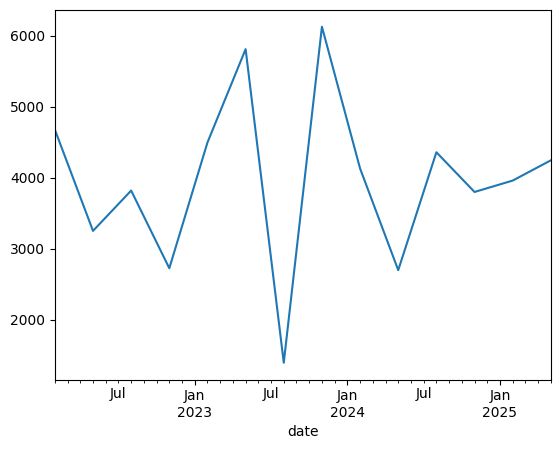

In [29]:
short_airbnb_df['text'].str.len().resample('3M').mean().plot()

/tmp/ipython-input-30-1820397299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')


<Axes: ylabel='date'>

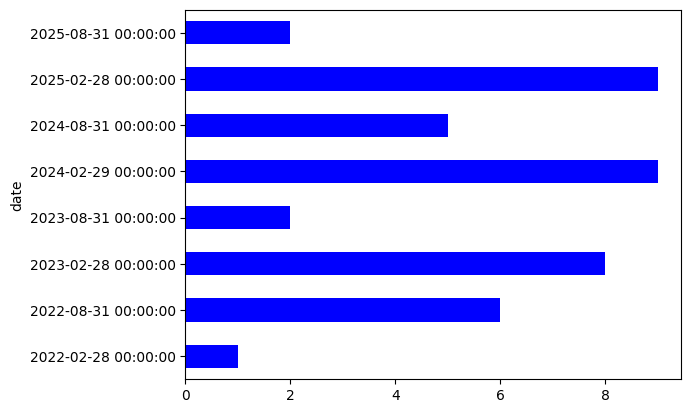

In [30]:
short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')

In [31]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [32]:
#plt.style.use('classic')
plt.style.use('ggplot')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

/tmp/ipython-input-33-175908563.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
/tmp/ipython-input-33-175908563.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-33-175908563.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-33-175908563.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-33-175908563.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inst

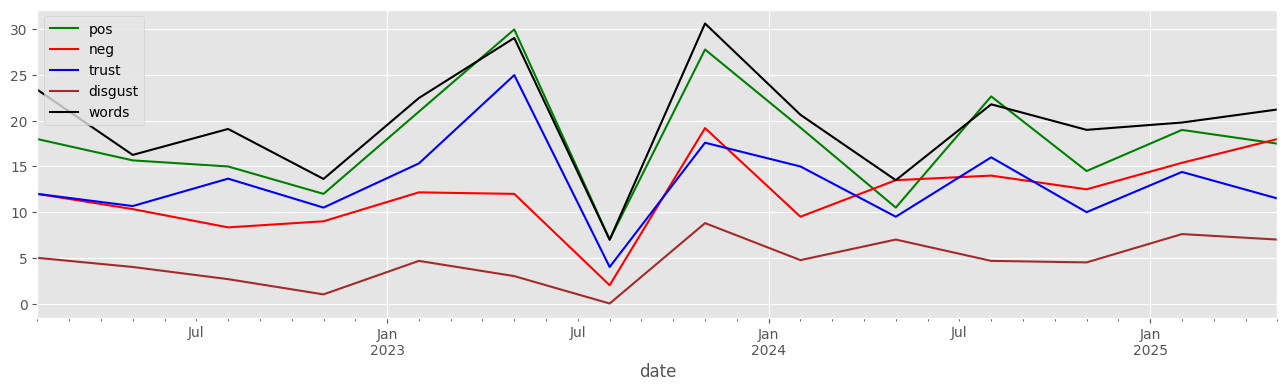

In [33]:
ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_airbnb_df['text'].str.len().resample('3M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [34]:
# daily_df = short_airbnb_df.resample('3M').mean().fillna(0)

/tmp/ipython-input-35-75750340.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))


<Axes: xlabel='date'>

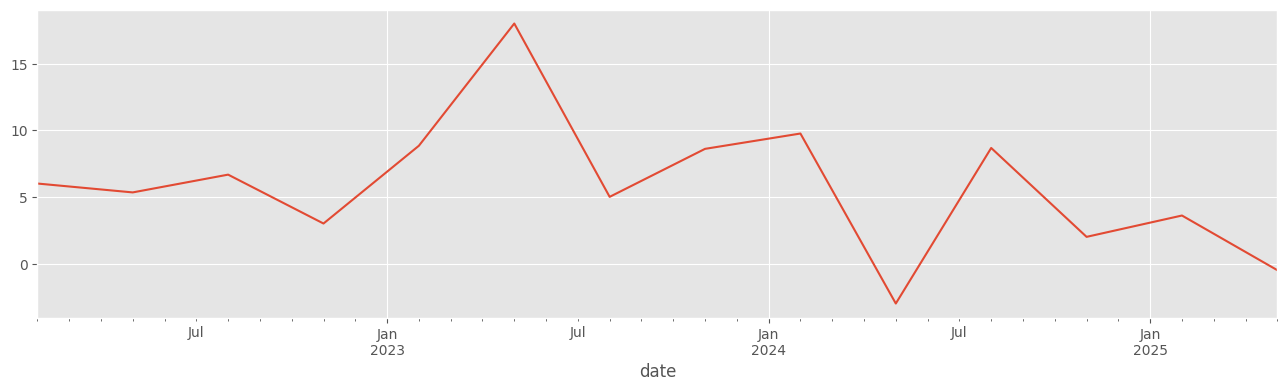

In [35]:
short_airbnb_df['pos/neg'] = short_airbnb_df['positive'] - short_airbnb_df['negative']
short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))

In [36]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-37-2136036587.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
/tmp/ipython-input-37-2136036587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0


<Axes: xlabel='date'>

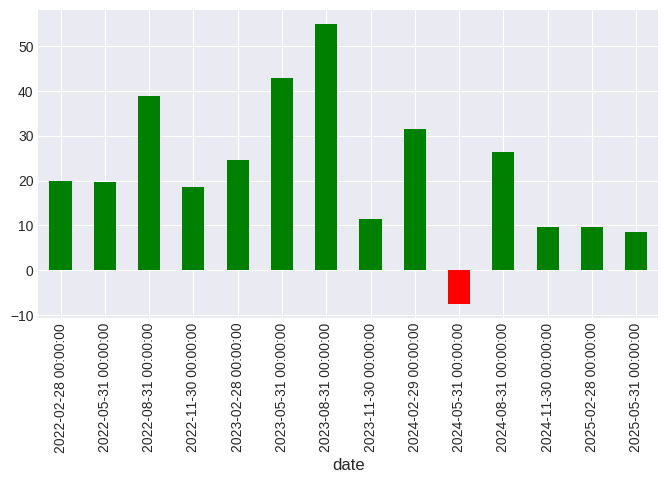

In [37]:
short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_airbnb_df.positive*100//short_airbnb_df[['positive','negative']].sum(
        axis=1) - short_airbnb_df.negative*100//short_airbnb_df[['positive','negative']].sum(axis=1)

short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
                                                                               color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

/tmp/ipython-input-38-2877103554.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col: short_airbnb_df[col].resample('3M').mean()


<Axes: xlabel='date'>

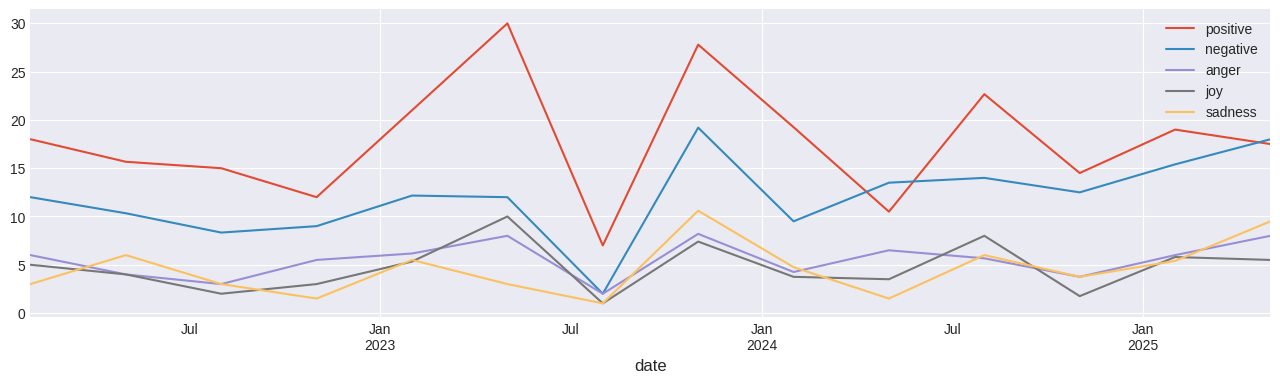

In [38]:
# List of emotion columns
emotion_cols = ['positive', 'negative', 'anger', 'joy', 'sadness']  # add your columns here

# Resample each and combine
resampled = pd.DataFrame({
    col: short_airbnb_df[col].resample('3M').mean()
    for col in emotion_cols
})

# Plot all lines on one figure
resampled.plot(figsize=(16,4), kind='line')

In [39]:
short_airbnb_df[
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].min())
][['positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

positive  negative  (-)αρνητικότητα | θετικότητα(+)
date                                                           
2024-04-28        16        22                              -15
2024-02-20        28         5                               69

In [40]:
text = airbnb_df['text_body'].str.cat(sep = ' ')

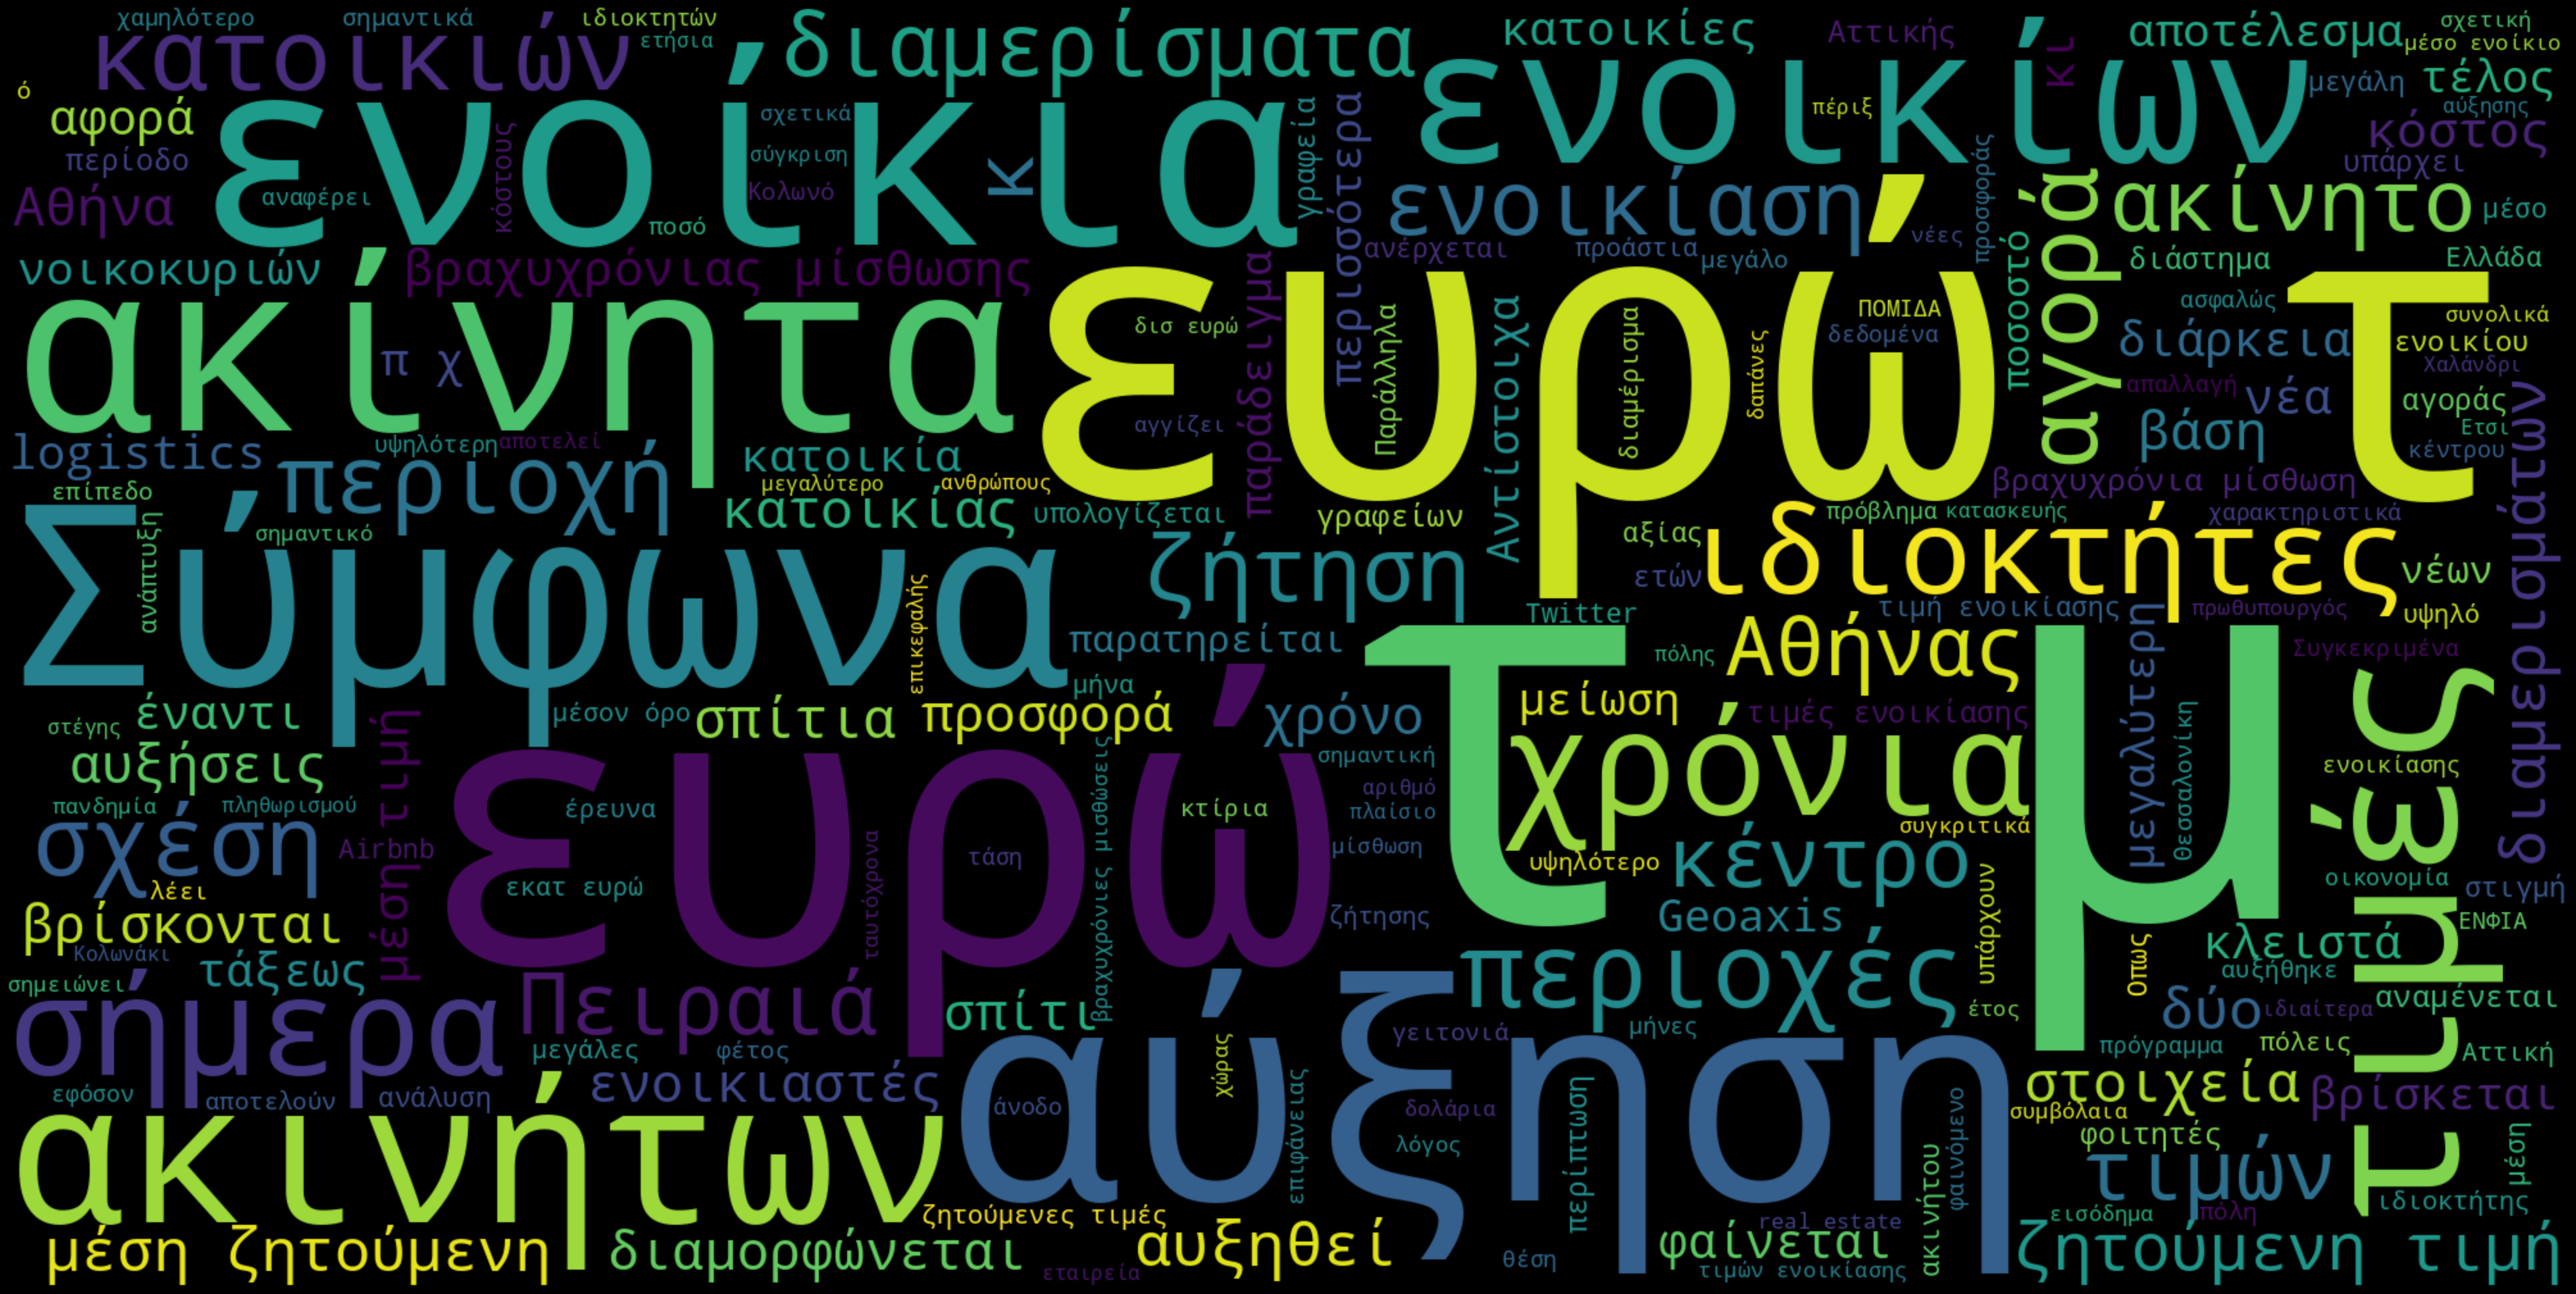

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud1 = WordCloud()
extra_stopwords = {'ή'}
all_stopwords = nlp.Defaults.stop_words.union(extra_stopwords)

wordcloud1 = WordCloud(
    stopwords=all_stopwords,
    width=2000,
    height=1000,
    background_color='black'
).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [42]:
mask = short_airbnb_df['text'].str.contains(r'Airbnb|airbnb|AIRBNB', na=False)
print(short_airbnb_df[mask])

                                                         text  anger  \
date                                                                   
2024-11-22  Χρήσιμα συμπεράσματα για την αποτελεσματικότητ...      2   
2024-09-15  Διπλή στόχευση αλλά με μία κοινή συνισταμένη, ...      5   
2023-10-24  Δούλεψα στον Κολωνό από το 2008 έως το 2011. Σ...     17   
2023-09-20  Ηπαρέμβαση της κυβέρνησης στο καθεστώς της βρα...      5   
2022-10-06  Την τελευταία 20ετία ο κατώτατος μισθός αυξήθη...      6   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2024-11-22         9    4        4         2      9             3        3   
2024-09-15        12    1        3         0      7             1        6   
2023-10-24        69   22       23        14     38            38       22   
2023-09-20        15    2        4         1      6             6        5   
2022-10-06        13    5  

In [43]:
filtered_df = short_airbnb_df[mask]
filtered_df

text  anger  \
date                                                                   
2024-11-22  Χρήσιμα συμπεράσματα για την αποτελεσματικότητ...      2   
2024-09-15  Διπλή στόχευση αλλά με μία κοινή συνισταμένη, ...      5   
2023-10-24  Δούλεψα στον Κολωνό από το 2008 έως το 2011. Σ...     17   
2023-09-20  Ηπαρέμβαση της κυβέρνησης στο καθεστώς της βρα...      5   
2022-10-06  Την τελευταία 20ετία ο κατώτατος μισθός αυξήθη...      6   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2024-11-22         9    4        4         2      9             3        3   
2024-09-15        12    1        3         0      7             1        6   
2023-10-24        69   22       23        14     38            38       22   
2023-09-20        15    2        4         1      6             6        5   
2022-10-06        13    5        1         0     11             7        3   

            negative  fear  pos/neg  (-)αρνητικότητα | θετικότητα(+)  
date                                                                  
2024-11-22         6     3        3                               20  
2024-09-15        13     3       -1                               -4  
2023-10-24        39    19       30                               27  
2023-09-20        11     3        4                               15  
2022-10-06        13     2        0                                0

In [44]:
len(filtered_df)

5

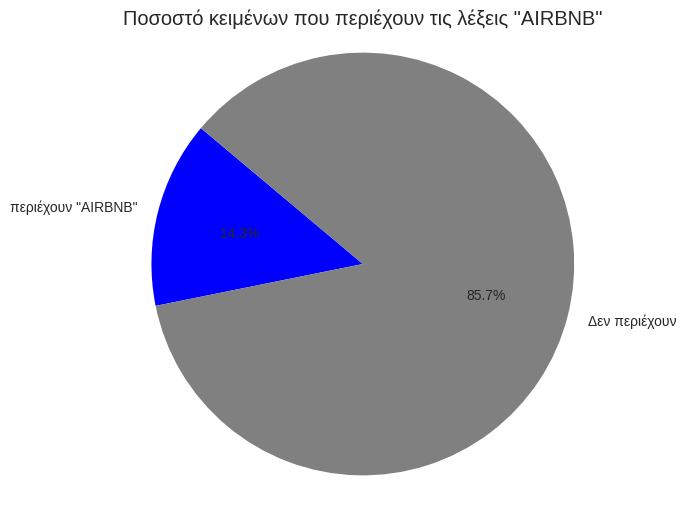

In [45]:
import matplotlib.pyplot as plt

# Δημιουργία μάσκας
mask = short_airbnb_df['text'].str.contains(r'Airbnb|airbnb|AIRBNB', case=False, na=False)

# Υπολογισμός αριθμών
matching = mask.sum()                   # Πόσες γραμμές καλύπτει η μάσκα (True)
not_matching = len(mask) - matching     # Όσες δεν την καλύπτουν

# Δεδομένα για το pie chart
labels = ['περιέχουν "AIRBNB"', 'Δεν περιέχουν']
sizes = [matching, not_matching]
colors = ['blue', 'gray']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ποσοστό κειμένων που περιέχουν τις λέξεις "AIRBNB"')
plt.axis('equal')  # κάνει τον κύκλο "στρογγυλό"
plt.show()